In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('./data/movie.csv')
#rating = pd.read_csv('./data/rating.csv')
#tag = pd.read_csv('./data/tag.csv')
#g_score = pd.read_csv('./data/genome_scores.csv')
#g_tag = pd.read_csv('./data/genome_tags.csv')

In [3]:
rating = pd.read_csv('./data/rating.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
import re

In [6]:
movies['title_format'] = movies['title'].apply(lambda x: re.search('\(\d+\)',x))

In [7]:
movies[movies['title_format'].isnull()]

,movieId,title,genres,title_format
10593,40697,Babylon 5,Sci-Fi,None
15646,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,None
17341,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,None
22368,107434,Diplomatic Immunity (2009– ),Comedy,None
22669,108548,"Big Bang Theory, The (2007-)",Comedy,None
22679,108583,Fawlty Towers (1975-1979),Comedy,None
23617,112406,Brazil: In the Shadow of the Stadiums,Documentary,None
23824,113190,Slaying the Badger,Documentary,None
24286,115133,Tatort: Im Schmerz geboren,Crime,None
24412,115685,National Theatre Live: Frankenstein,Drama|Fantasy,None


In [8]:
movies.shape

(27278, 4)

In [9]:
# Remove from list movies with no release year
movies = movies[movies['title_format'].isnull()==False]

In [10]:
movies.shape

(27256, 4)

In [11]:
movies['title_name'] = movies['title'].apply(lambda x: x[:re.search('\(\d+\)',x).start()])

In [12]:
movies.head()

,movieId,title,genres,title_format,title_name
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x114510b90>,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,<_sre.SRE_Match object at 0x114510bf8>,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,<_sre.SRE_Match object at 0x114510c60>,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,<_sre.SRE_Match object at 0x114510cc8>,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,<_sre.SRE_Match object at 0x114510d30>,Father of the Bride Part II


In [13]:
movies['year'] = movies['title'].apply(lambda x: re.search('\(\d+\)',x).group(0))

In [14]:
movies.head()

,movieId,title,genres,title_format,title_name,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x114510b90>,Toy Story,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,<_sre.SRE_Match object at 0x114510bf8>,Jumanji,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,<_sre.SRE_Match object at 0x114510c60>,Grumpier Old Men,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,<_sre.SRE_Match object at 0x114510cc8>,Waiting to Exhale,(1995)
4,5,Father of the Bride Part II (1995),Comedy,<_sre.SRE_Match object at 0x114510d30>,Father of the Bride Part II,(1995)


In [15]:
movies['released_year'] = movies['year'].apply(lambda x: re.search('\d+',x).group())

In [16]:
movies.head()

,movieId,title,genres,title_format,title_name,year,released_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x114510b90>,Toy Story,(1995),1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,<_sre.SRE_Match object at 0x114510bf8>,Jumanji,(1995),1995
2,3,Grumpier Old Men (1995),Comedy|Romance,<_sre.SRE_Match object at 0x114510c60>,Grumpier Old Men,(1995),1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,<_sre.SRE_Match object at 0x114510cc8>,Waiting to Exhale,(1995),1995
4,5,Father of the Bride Part II (1995),Comedy,<_sre.SRE_Match object at 0x114510d30>,Father of the Bride Part II,(1995),1995


In [17]:
movies_by_year = movies['released_year'].value_counts().reset_index()

In [18]:
movies_by_year.columns = ['released_year','number_of_movies']

In [19]:
movies_by_year = movies_by_year.sort_values(by='released_year')

In [20]:
movies_by_year.head()

,released_year,number_of_movies
112,06,1
111,1891,1
120,1893,1
107,1894,2
108,1895,2


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]), <a list of 121 Text xticklabel objects>)

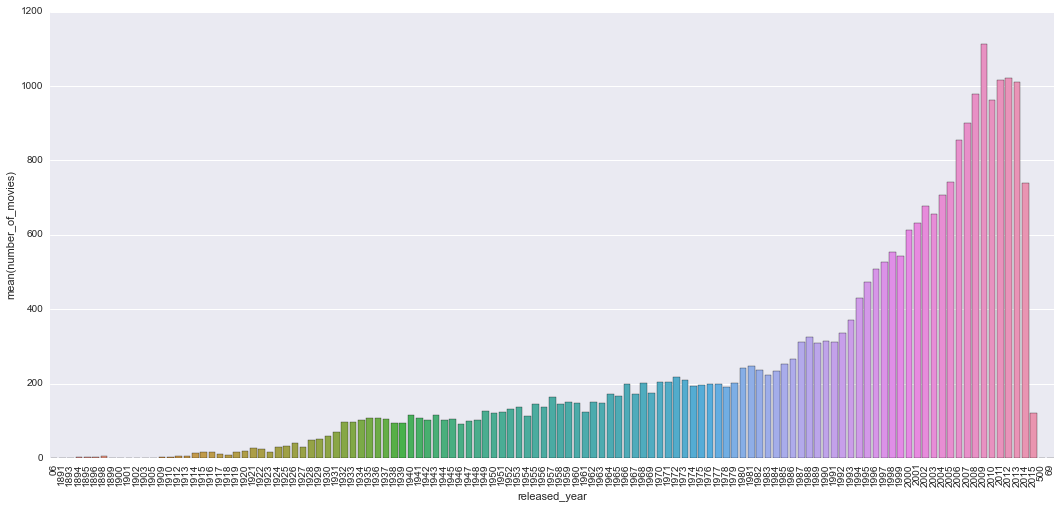

In [22]:
plt.rcParams['figure.figsize'] = (18, 8)
ax = sns.barplot(movies_by_year.released_year, movies_by_year.number_of_movies)
plt.xticks(rotation=90)

In [23]:
movies['genre_list'] = movies['genres'].apply(lambda x: x.split('|'))

In [24]:
movies.head()

,movieId,title,genres,title_format,title_name,year,released_year,genre_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x114510b90>,Toy Story,(1995),1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,<_sre.SRE_Match object at 0x114510bf8>,Jumanji,(1995),1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,<_sre.SRE_Match object at 0x114510c60>,Grumpier Old Men,(1995),1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,<_sre.SRE_Match object at 0x114510cc8>,Waiting to Exhale,(1995),1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,<_sre.SRE_Match object at 0x114510d30>,Father of the Bride Part II,(1995),1995,[Comedy]


In [25]:
l = movies.loc[0,'genre_list']

In [26]:
l

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [27]:
np.array(l)

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'], 
      dtype='|S9')

In [28]:
pd.get_dummies(pd.DataFrame(movies.loc[0,'genre_list'],columns=['genre']))

,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Fantasy
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [29]:
movies_genre = movies.genres.str.get_dummies('|')

In [30]:
df_movies = pd.merge(movies, movies_genre, how='inner', left_index=True, right_index=True)

In [31]:
df_movies.head()

,movieId,title,genres,title_format,title_name,year,released_year,genre_list,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x114510b90>,Toy Story,(1995),1995,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,<_sre.SRE_Match object at 0x114510bf8>,Jumanji,(1995),1995,"[Adventure, Children, Fantasy]",0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,<_sre.SRE_Match object at 0x114510c60>,Grumpier Old Men,(1995),1995,"[Comedy, Romance]",0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,<_sre.SRE_Match object at 0x114510cc8>,Waiting to Exhale,(1995),1995,"[Comedy, Drama, Romance]",0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,<_sre.SRE_Match object at 0x114510d30>,Father of the Bride Part II,(1995),1995,[Comedy],0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_movies.columns

Index([u'movieId', u'title', u'genres', u'title_format', u'title_name',
       u'year', u'released_year', u'genre_list', u'(no genres listed)',
       u'Action', u'Adventure', u'Animation', u'Children', u'Comedy', u'Crime',
       u'Documentary', u'Drama', u'Fantasy', u'Film-Noir', u'Horror', u'IMAX',
       u'Musical', u'Mystery', u'Romance', u'Sci-Fi', u'Thriller', u'War',
       u'Western'],
      dtype='object')

In [33]:
genre_list = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
              'Musical','Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
year_genre_movies = df_movies.groupby(['released_year'])[genre_list].sum()

In [34]:
len(df_movies[(df_movies.released_year=='2000') & (df_movies.Comedy==1)])

223

In [35]:
year_genre_movies.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
released_year,,,,,,,,,,,,,,,,,,,
06,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1894,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1895,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
year_genre_movies = year_genre_movies.reset_index()

In [37]:
year_genre_movies.shape

(121, 20)

In [38]:
year_genre_movies = year_genre_movies[year_genre_movies.released_year.isin(['06','60','500','69'])==False]

In [39]:
year_genre_movies.shape

(118, 20)

In [40]:
year_genre_movies = year_genre_movies.set_index('released_year')

In [41]:
year_genre_movies.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
released_year,,,,,,,,,,,,,,,,,,,
1891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1894,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1895,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1896,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


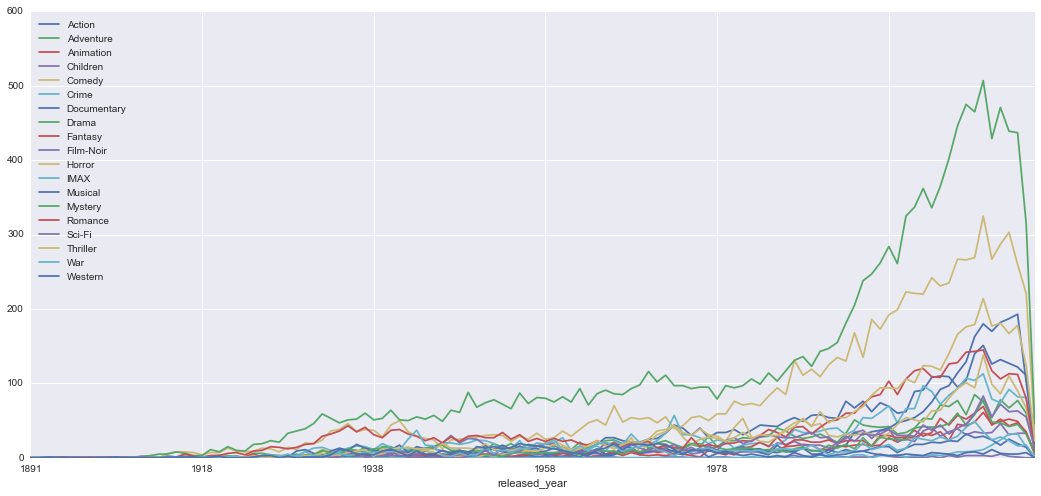

In [42]:
ax = year_genre_movies.plot()

In [78]:
df_movies[df_movies.title_name.str.contains('Spirit')]

,movieId,title,genres,title_format,title_name,year,released_year,genre_list,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
465,469,"House of the Spirits, The (1993)",Drama|Romance,<_sre.SRE_Match object at 0x1087b83d8>,"House of the Spirits, The",(1993),1993,"[Drama, Romance]",0,0,...,0,0,0,0,0,1,0,0,0,0
762,775,Spirits of the Dead (1968),Horror|Mystery,<_sre.SRE_Match object at 0x1087cc100>,Spirits of the Dead,(1968),1968,"[Horror, Mystery]",0,0,...,0,1,0,0,1,0,0,0,0,0
4351,4446,Final Fantasy: The Spirits Within (2001),Adventure|Animation|Fantasy|Sci-Fi,<_sre.SRE_Match object at 0x10878e7e8>,Final Fantasy: The Spirits Within,(2001),2001,"[Adventure, Animation, Fantasy, Sci-Fi]",0,0,...,0,0,0,0,0,0,1,0,0,0
4364,4459,Alaska: Spirit of the Wild (1997),Documentary|IMAX,<_sre.SRE_Match object at 0x10878ed30>,Alaska: Spirit of the Wild,(1997),1997,"[Documentary, IMAX]",0,0,...,0,0,1,0,0,0,0,0,0,0
4416,4511,High Spirits (1988),Comedy,<_sre.SRE_Match object at 0x1087d0370>,High Spirits,(1988),1988,[Comedy],0,0,...,0,0,0,0,0,0,0,0,0,0
5248,5345,Triumph of the Spirit (1989),Drama,<_sre.SRE_Match object at 0x1087e61d0>,Triumph of the Spirit,(1989),1989,[Drama],0,0,...,0,0,0,0,0,0,0,0,0,0
5292,5389,Spirit: Stallion of the Cimarron (2002),Adventure|Animation|Children|Western,<_sre.SRE_Match object at 0x1087e7440>,Spirit: Stallion of the Cimarron,(2002),2002,"[Adventure, Animation, Children, Western]",0,0,...,0,0,0,0,0,0,0,0,0,1
5519,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,<_sre.SRE_Match object at 0x1087ed3d8>,Spirited Away (Sen to Chihiro no kamikakushi),(2001),2001,"[Adventure, Animation, Fantasy]",0,0,...,0,0,0,0,0,0,0,0,0,0
6369,6479,"Spirit of '76, The (1990)",Comedy|Sci-Fi,<_sre.SRE_Match object at 0x108803988>,"Spirit of '76, The",(1990),1990,"[Comedy, Sci-Fi]",0,0,...,0,0,0,0,0,0,1,0,0,0
6955,7067,Juliet of the Spirits (Giulietta degli spiriti...,Comedy|Drama|Fantasy|Romance,<_sre.SRE_Match object at 0x108813098>,Juliet of the Spirits (Giulietta degli spiriti),(1965),1965,"[Comedy, Drama, Fantasy, Romance]",0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
rating[rating.movieId==5673].rating.describe()

count    5419.000000
mean        3.556653
std         1.040577
min         0.500000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
rating[rating.movieId==2].rating.describe()

count    22243.000000
mean         3.211977
std          0.951150
min          0.500000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [6]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [7]:
tag[tag.movieId==2].tag.unique()

array(['time travel', 'adapted from:book', 'board game',
       'childhood recaptured', 'game', 'herds of CGI animals', 'scary',
       'see also:Zathura', 'time', 'fantasy', 'Robin Williams',
       'Joe Johnston', 'kid flick', 'jungle', 'animals', 'Lebbat',
       'adventure', 'Children', 'Fantasy', 'Dynamic CGI Action',
       'Kirsten Dunst', 'For children', 'childish', 'children',
       'Filmed in BC', 'bad cgi', 'based on a book', 'Chris Van Allsburg',
       'magic board game', 'monkey', 'Saturn Award (Best Special Effects)',
       'Saturn Award (Best Supporting Actress)', 'CLV',
       'horrifying (but not Horror genre)', 'not for kids'], dtype=object)

In [8]:
g_score.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [9]:
movies.shape, g_score.shape, g_tag.shape, tag.shape, len(tag.tag.unique())

((27278, 3), (11709768, 3), (1128, 2), (465564, 4), 38644)

In [11]:
g_tag.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [17]:
# Change Dates columns to Python Date format
tag['timestamp'] = pd.to_datetime(tag['timestamp'], format='%Y-%m-%d %H:%M:%S')
rating['timestamp'] = pd.to_datetime(rating['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [18]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [19]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [20]:
# Extract Date Features
import datetime as dt
rating['hour'] = rating['timestamp'].dt.hour
rating['weekday'] = rating['timestamp'].dt.weekday
rating['month'] = rating['timestamp'].dt.month
rating['quarter'] = rating['timestamp'].dt.quarter
rating['year'] = rating['timestamp'].dt.year

tag['hour'] = tag['timestamp'].dt.hour
tag['weekday'] = tag['timestamp'].dt.weekday
tag['month'] = tag['timestamp'].dt.month
tag['quarter'] = tag['timestamp'].dt.quarter
tag['year'] = tag['timestamp'].dt.year

In [21]:
rating.head()

,userId,movieId,rating,timestamp,hour,weekday,month,quarter,year
0,1,2,3.5,2005-04-02 23:53:47,23,5,4,2,2005
1,1,29,3.5,2005-04-02 23:31:16,23,5,4,2,2005
2,1,32,3.5,2005-04-02 23:33:39,23,5,4,2,2005
3,1,47,3.5,2005-04-02 23:32:07,23,5,4,2,2005
4,1,50,3.5,2005-04-02 23:29:40,23,5,4,2,2005


In [22]:
tag.head()

,userId,movieId,tag,timestamp,hour,weekday,month,quarter,year
0,18,4141,Mark Waters,2009-04-24 18:19:40,18,4,4,2,2009
1,65,208,dark hero,2013-05-10 01:41:18,1,4,5,2,2013
2,65,353,dark hero,2013-05-10 01:41:19,1,4,5,2,2013
3,65,521,noir thriller,2013-05-10 01:39:43,1,4,5,2,2013
4,65,592,dark hero,2013-05-10 01:41:18,1,4,5,2,2013
